<a href="https://colab.research.google.com/github/PurveshBaghele/ML/blob/master/mnist_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from keras.layers.convolutional import Conv2D 
#from keras.layers import Flatten
from keras.layers.convolutional import Conv2D

from keras.layers.convolutional import MaxPooling2D
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [0]:
assert(X_train.shape[0] == Y_train.shape[0]),"Number of images not equal to number of labels"

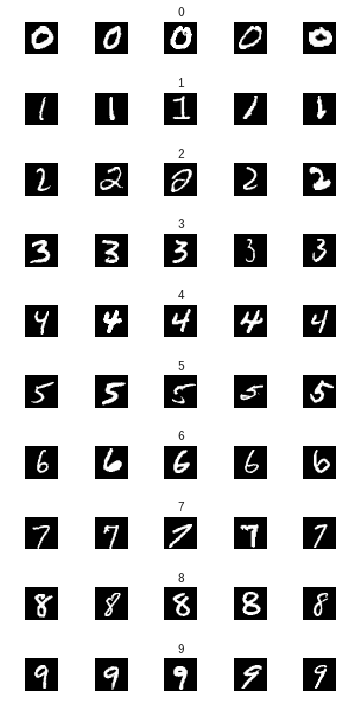

In [79]:
num_samples=[]

cols = 5
rows = 10

fig,axis = plt.subplots(nrows = rows,ncols = cols,figsize = [5,10])
fig.tight_layout()

for i in range (cols):
    for j in range (rows):
        x_selected = X_train[Y_train==j]
        axis[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if(i==2):
            axis[j][i].set_title(str(j))
            num_samples.append(len(x_selected))

In [80]:
print(num_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of samples')

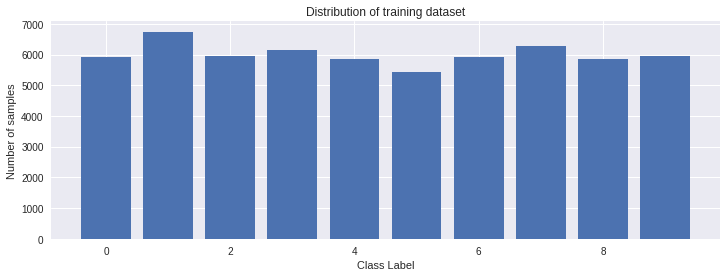

In [81]:
plt.figure(figsize=(12,4))
plt.bar(range(0,rows),num_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of samples")

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

In [0]:
#normalisation process, makes it easier to find the proper weights, bias, and hyperparameter values  
X_train = X_train/255
X_test = X_test/255

In [0]:
def leNet_model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(Adam(0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model
  
  

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=number_pixels,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model;

In [86]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total para

In [87]:
history =model.fit(X_train,Y_train,validation_split = 0.1,epochs=10,batch_size=400,verbose=1,shuffle=1 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 46us/step - loss: 0.2295 - acc: 0.9306 - val_loss: 0.0495 - val_acc: 0.9830
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0504 - acc: 0.9848 - val_loss: 0.0423 - val_acc: 0.9873
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0493 - val_acc: 0.9862
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0375 - val_acc: 0.9898
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0428 - val_acc: 0.9880
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0487 - val_acc: 0.9882
Epoch 7/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0241 - acc: 0.9924 - val_loss: 0.0393 - val_acc:

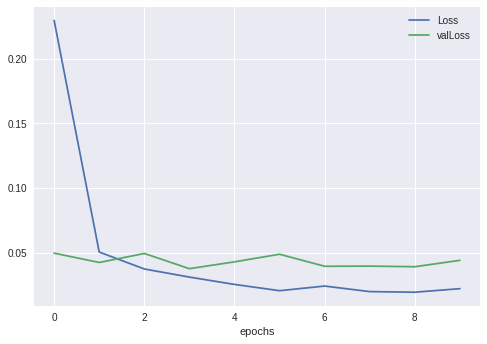

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.legend(['Loss','valLoss'])

In [91]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score = ',score[0])
print('Test Accuracy = ',score[1])

Test score =  0.03449447358118805
Test Accuracy =  0.9898


predicted digit =  [2]


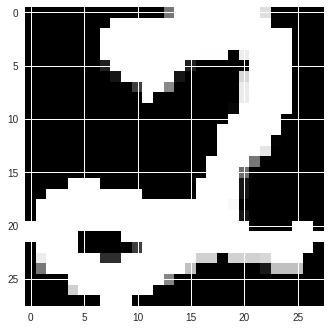

In [99]:
import requests
from PIL import Image
import cv2

url ='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response=requests.get(url,stream=True)

img = Image.open(response.raw)

img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

image = image/255
image = image.reshape(1,28,28,1)
pred= model.predict_classes(image)
print("predicted digit = ",str(pred))